# Importing necessary libaries and packages

In [81]:
import pandas as pd
import scipy.stats as stats
import statsmodels.api as sm
import matplotlib.pyplot as plt

In [82]:
# Load the dataset
df = pd.read_excel('../inputs/data.xlsx')

In [83]:
df.head()

,Country,State,City,BUYbroccoli,BUYasparagus,BUYsquash,BUYcupcakes,BUYcheesecake,BUYdonut,BUYcocacola,...,Pvalue_Utilitarian,EBTuser,HouseholdType,Female,Age,Income,logincome,Household_size,Education,Degree
0,United States,MN,Saint Cloud,1,1,1,1,0,1,1,...,1.50,0,Non-SNAP,0,39,95000,11.461643,4.0,2,0
1,United States,AR,Mountain Home,1,1,0,1,0,0,1,...,3.25,0,Non-SNAP,0,46,35000,10.463132,1.0,3,0
2,United States,IL,Hanover Park,0,0,0,1,1,1,1,...,4.25,0,Non-SNAP,1,27,65000,11.082158,3.0,4,0
3,United States,ME,Poland,1,1,1,0,0,0,0,...,2.75,0,Non-SNAP,0,33,65000,11.082158,2.0,3,0
4,United States,GA,Stockbridge,1,1,1,0,0,0,0,...,4.25,0,Non-SNAP,0,28,95000,11.461643,2.0,3,0


In [84]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1002 entries, 0 to 1001
Data columns (total 32 columns):
 #   Column                         Non-Null Count  Dtype  
---  ------                         --------------  -----  
 0   Country                        1002 non-null   object 
 1   State                          990 non-null    object 
 2   City                           981 non-null    object 
 3   BUYbroccoli                    1002 non-null   int64  
 4   BUYasparagus                   1002 non-null   int64  
 5   BUYsquash                      1002 non-null   int64  
 6   BUYcupcakes                    1002 non-null   int64  
 7   BUYcheesecake                  1002 non-null   int64  
 8   BUYdonut                       1002 non-null   int64  
 9   BUYcocacola                    1002 non-null   int64  
 10  BUYmuesli                      1002 non-null   int64  
 11  Number_HedonicProducts         1002 non-null   int64  
 12  Number_UtilitarianProducts     1002 non-null   i

In [85]:
# Split the data into SNAP and non-SNAP households
snap_data = df[df['HouseholdType'] == 'SNAP']
non_snap_data = df[df['HouseholdType'] == 'Non-SNAP']

In [86]:
non_snap_data.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 846 entries, 0 to 1000
Data columns (total 32 columns):
 #   Column                         Non-Null Count  Dtype  
---  ------                         --------------  -----  
 0   Country                        846 non-null    object 
 1   State                          837 non-null    object 
 2   City                           831 non-null    object 
 3   BUYbroccoli                    846 non-null    int64  
 4   BUYasparagus                   846 non-null    int64  
 5   BUYsquash                      846 non-null    int64  
 6   BUYcupcakes                    846 non-null    int64  
 7   BUYcheesecake                  846 non-null    int64  
 8   BUYdonut                       846 non-null    int64  
 9   BUYcocacola                    846 non-null    int64  
 10  BUYmuesli                      846 non-null    int64  
 11  Number_HedonicProducts         846 non-null    int64  
 12  Number_UtilitarianProducts     846 non-null    in

# Q1 Does the type of food purchased by SNAP houesholds differ from those purchased by non-SNAP housesholds?

## Perform statistical tests to compare the purchases of hedonic and utilitarian food items

In [105]:
from scipy.stats import ttest_ind

# T-Test for Number of Hedonic Products (Assuming equal Variances)
hedonic_snap = snap_data['Number_HedonicProducts']
hedonic_non_snap = non_snap_data['Number_HedonicProducts']

t_statistic, p_value = ttest_ind(hedonic_snap, hedonic_non_snap, equal_var=True)

print("Number of Hedonic Products:")
print("SNAP vs. Non-SNAP")
print("t-statistic:", t_statistic)
print("p-value:", p_value)
print("------------------------------")

# T-Test for Number of Utilitarian Products (Assuming equal Variances)
utilitarian_snap = snap_data['Number_UtilitarianProducts']
utilitarian_non_snap = non_snap_data['Number_UtilitarianProducts']
t_statistic, p_value = ttest_ind(utilitarian_snap, utilitarian_non_snap, equal_var=True)
print("Number of Utilitarian Products:")
print("SNAP vs. Non-SNAP")
print("t-statistic:", t_statistic)
print("p-value:", p_value)

Number of Hedonic Products:
SNAP vs. Non-SNAP
t-statistic: 4.922089850084236
p-value: 1.0009968767798903e-06
------------------------------
Number of Utilitarian Products:
SNAP vs. Non-SNAP
t-statistic: -3.6058224820172438
p-value: 0.0003265336401862399


                                  Category  Average Value
0          Average Hedonic Products (SNAP)       2.019231
1      Average Hedonic Products (Non-SNAP)       1.515366
2      Average Utilitarian Products (SNAP)       1.801282
3  Average Utilitarian Products (Non-SNAP)       2.122931


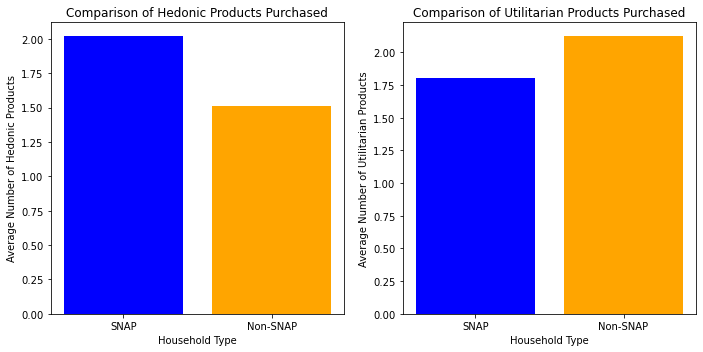

In [88]:
# Calculate the average number of hedonic and utilitarian products for SNAP and non-SNAP households
avg_hedonic_snap = snap_data['Number_HedonicProducts'].mean()
avg_hedonic_non_snap = non_snap_data['Number_HedonicProducts'].mean()

avg_utilitarian_snap = snap_data['Number_UtilitarianProducts'].mean()
avg_utilitarian_non_snap = non_snap_data['Number_UtilitarianProducts'].mean()

# Create a dictionary with the average values
data = {
    "Category": ["Average Hedonic Products (SNAP)", "Average Hedonic Products (Non-SNAP)",
                 "Average Utilitarian Products (SNAP)", "Average Utilitarian Products (Non-SNAP)"],
    "Average Value": [avg_hedonic_snap, avg_hedonic_non_snap, avg_utilitarian_snap, avg_utilitarian_non_snap]
}

# Create a dataframe from the dictionary
df1 = pd.DataFrame(data)

# Print the dataframe
print(df1)

# Create a figure with two subplots
fig, axs = plt.subplots(1, 2, figsize=(10, 5))

# Plot the average number of hedonic products
axs[0].bar(['SNAP', 'Non-SNAP'], [avg_hedonic_snap, avg_hedonic_non_snap], color=['blue', 'orange'])
axs[0].set_xlabel('Household Type')
axs[0].set_ylabel('Average Number of Hedonic Products')
axs[0].set_title('Comparison of Hedonic Products Purchased')

# Plot the average number of utilitarian products
axs[1].bar(['SNAP', 'Non-SNAP'], [avg_utilitarian_snap, avg_utilitarian_non_snap], color=['blue', 'orange'])
axs[1].set_xlabel('Household Type')
axs[1].set_ylabel('Average Number of Utilitarian Products')
axs[1].set_title('Comparison of Utilitarian Products Purchased')

# Adjust the spacing between subplots
plt.tight_layout()

# Display the figure
plt.show()

## Interpretation of Results

### Number of Hedonic Products:
* The t-statistic value of 4.922089850084236 suggests that there is a significant difference in the average number of hedonic products purchased between SNAP and non-SNAP households.
* The positive t-statistic indicates that, on average, SNAP households tend to purchase a higher number of hedonic products compared to non-SNAP households.
* The p-value is 1.0009968767798903e-06, which is smaller than the conventional significance level of 0.05. This indicates strong evidence to reject the null hypothesis that there is no difference in the number of hedonic products purchased by SNAP and non-SNAP households.

### Number of Utilitarian Products:

* The t-statistic value of -3.6058224820172438 suggests that there is a significant difference in the average number of utilitarian products purchased between SNAP and non-SNAP households.
* The negative t-statistic indicates that, on average, SNAP households tend to purchase a lower number of utilitarian products compared to non-SNAP households.
* The p-value is 0.0003265336401862399 (less than 0.05), indicating strong evidence to reject the null hypothesis that there is no difference in the number of utilitarian products purchased by SNAP and non-SNAP households.

### Visualization
* The comparison of Hedonic Products Purchased by Household Type shows that SNAP households purchase on average 2.02 hedonic products compared to Non-Snap households at 1.52 hedonic products.
* The comparison of Utilitarian Products Purchased by Household Type shows that SNAP households on average purchase 1.8 utilitarian products compared to Non-Snap households at 2.12 utilitarian products.

In summary, based on these results, it can be concluded that SNAP households tend to purchase a higher number of hedonic products and a lower number of utilitarian products compared to non-SNAP households.

# Q2 It is often argued that SNAP households’ food consumption habits can be attributed to their lower income and/or education. Based on these data, does income and education explain the consumption pattern of SNAP households?

## Perform OLS regression

In [104]:
# Prepare the independent variables (income and education)
independent_vars = ['Income', 'Education']

# Prepare the dependent variables (consumption patterns)
dependent_vars = ['Number_HedonicProducts', 'Number_UtilitarianProducts', 'Hedonic_Value', 'Utilitarian_Value']

# Subset the data for SNAP households
snap_data_subset = snap_data[independent_vars + dependent_vars].dropna()

# Add a constant term to the independent variables
independent_vars_with_const = sm.add_constant(snap_data_subset[independent_vars])

# Perform multiple linear regression for each dependent variable
for var in dependent_vars:
    model = sm.OLS(snap_data_subset[var], independent_vars_with_const)
    results = model.fit()

    print(f"Dependent Variable: {var}")
    print(results.summary().tables[1])
    print()


Dependent Variable: Number_HedonicProducts
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const          2.1938      0.274      8.017      0.000       1.653       2.734
Income      3.513e-06   3.53e-06      0.995      0.321   -3.46e-06    1.05e-05
Education     -0.0794      0.063     -1.262      0.209      -0.204       0.045

Dependent Variable: Number_UtilitarianProducts
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const          1.7181      0.242      7.089      0.000       1.239       2.197
Income     -3.206e-06   3.13e-06     -1.026      0.307   -9.38e-06    2.97e-06
Education      0.0537      0.056      0.965      0.336      -0.056       0.164

Dependent Variable: Hedonic_Value
                 coef    std err          t      P>|t|      [0.025      0.975]
-----

## Interpretation of Results

Based on the statistical analysis results, the p-values for both income and education exceed the conventional significance level of 0.05 for all dependent variables. **Therefore, income and education are not statistically significant predictors of the consumption patterns of SNAP households, and we fail to reject the null hypothesis.** In other words, the results suggest that there is no statistically significant relationship between education or income and the consumption patterns of SNAP households. It is important to note that any observed associations between education or income and the dependent variables could be due to chance or random variation.

* Specifically, for the dependent variable "Number_HedonicProducts", neither income (p-value = 0.321) nor education (p-value = 0.209) demonstrate a significant relationship. 

* Similarly, for "Number_UtilitarianProducts", both income (p-value = 0.307) and education (p-value = 0.336) do not have a statistically significant impact on the consumption pattern. 

* The same lack of significance holds true for "Hedonic_Value" (income p-value = 0.233, education p-value = 0.183) and "Utilitarian_Value" (income p-value = 0.292, education p-value = 0.455).

Consequently, based on these findings, we cannot conclude that the consumption patterns of SNAP households can be solely explained by income and education. It is likely that other unexplored factors or variables play a more influential role in determining the consumption patterns of SNAP households. Further investigation is needed to identify these additional factors and understand their impact.